In [1]:
## Realizo ranking por indicador
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

import numpy as np
import os

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Definimos path
path = os.path.join(os.path.expanduser('~'), 'Documents/Fundar/indice-mercado-trabajo-ingresos/')

# Definimos fuente para los graficos
font_dir = [path + 'basemaps/Archivo/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

rcParams['font.family'] = 'Archivo'

ModuleNotFoundError: No module named 'sklearn'

In [28]:
# Definimos path
pathdata = '/home/daniu/Documentos/fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/Users/danielarisaro/Documents/Fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/'


In [29]:
ratio_actividad = pd.read_csv(pathdata + 'data_output/indicadores/01_ratio_actividad.csv', index_col=0)
empleo_asalariado_con_descuento = pd.read_csv(pathdata + 'data_output/indicadores/02_empleo_asalariado_con_descuento.csv', index_col=0)
horas_remuneradas_media = pd.read_csv(pathdata + 'data_output/indicadores/03_horas_promedio_ocup_ppal.csv', index_col=0)
ingreso_salarial_media = pd.read_csv(pathdata + 'data_output/indicadores/04_ingreso_salarial.csv', index_col=0)
ratio_minutos_promedio_no_pago = pd.read_csv(pathdata + 'data_output/indicadores/05_tiempo_no_remunerado.csv', index_col=0)
inactivos_con_ingreso = pd.read_csv(pathdata + 'data_output/indicadores/06_dependencia_economica.csv', index_col=0)
hogares_jefatura = pd.read_csv(pathdata + 'data_output/indicadores/07_hogares_no-pobres_jefatura.csv', index_col=0)

In [30]:
ratio_actividad = ratio_actividad.sort_index()
empleo_asalariado_con_descuento = empleo_asalariado_con_descuento.sort_index()
horas_remuneradas_media = horas_remuneradas_media.sort_index()
ingreso_salarial_media = ingreso_salarial_media.sort_index()
ratio_minutos_promedio_no_pago = ratio_minutos_promedio_no_pago.sort_index()
inactivos_con_ingreso = inactivos_con_ingreso.sort_index()
hogares_jefatura = hogares_jefatura.sort_index()


In [31]:
variables = [ratio_actividad, empleo_asalariado_con_descuento, horas_remuneradas_media, ingreso_salarial_media, ratio_minutos_promedio_no_pago, inactivos_con_ingreso, hogares_jefatura]
columnas = ['Actividad', 'Formalidad', 'Horas promedio remuneradas', 'Ingreso laboral promedio', 'Tiempo TNR', 'Dependencia', 'No Pobreza']

for columna, variable in zip(columnas,variables):
    variable[columna] = np.where(variable[columna] > 100, 100, variable[columna])

In [35]:
variables = [ratio_actividad, empleo_asalariado_con_descuento, horas_remuneradas_media, ingreso_salarial_media, ratio_minutos_promedio_no_pago, inactivos_con_ingreso, hogares_jefatura]

In [36]:
df_temp = pd.concat(variables, axis=1)[['Actividad', 'Formalidad', 'Horas promedio remuneradas', 'Ingreso laboral promedio', 'Tiempo TNR', 'Dependencia', 'No Pobreza']]


In [37]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df_temp.mean(axis=0)

----------------------
Media de cada variable
----------------------


Actividad                     68.778042
Formalidad                    92.598568
Horas promedio remuneradas    77.332984
Ingreso laboral promedio      77.392175
Tiempo TNR                    48.966548
Dependencia                   90.338410
No Pobreza                    89.409942
dtype: float64

In [13]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df_temp.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Actividad                     52.964939
Formalidad                    26.182077
Horas promedio remuneradas    18.824624
Ingreso laboral promedio      53.132014
Tiempo TNR                    36.451973
Dependencia                   52.136621
No Pobreza                    64.242274
dtype: float64

In [14]:
ncomponentes = 7

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=ncomponentes))
pca_pipe.fit(df_temp)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

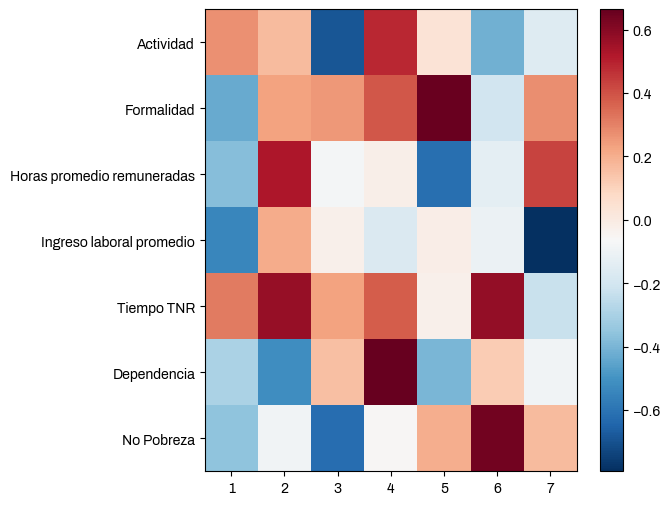

In [16]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='RdBu_r', aspect='auto')
plt.yticks(range(len(df_temp.columns)), df_temp.columns)
plt.xticks(range(len(df_temp.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

In [17]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
idx = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

df_loadings = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_temp.columns,
    index   = idx[0:ncomponentes]
)
df_loadings.round(2).to_clipboard()

In [40]:
df_loadings

,Actividad,Formalidad,Horas promedio remuneradas,Ingreso laboral promedio,Tiempo TNR,Dependencia,No Pobreza
PC1,0.266303,-0.431797,-0.374002,-0.536837,0.311335,-0.297599,-0.359260
PC2,0.166158,0.228294,0.527116,0.208455,0.569809,-0.515876,-0.090329
PC3,-0.685436,0.252446,-0.080364,-0.028217,0.227632,0.157175,-0.618607
PC4,0.483168,0.389127,-0.022829,-0.167480,0.377373,0.663879,-0.058420
PC5,0.032781,0.653931,-0.610639,-0.014187,-0.029736,-0.397351,0.198614
PC6,-0.414181,-0.205019,-0.136515,-0.105270,0.576789,0.118829,0.640232
PC7,-0.159940,0.276814,0.428691,-0.792606,-0.224927,-0.088654,0.165352


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.4072474  0.19657398 0.16708521 0.08801635 0.06747571 0.05169732
 0.02190404]


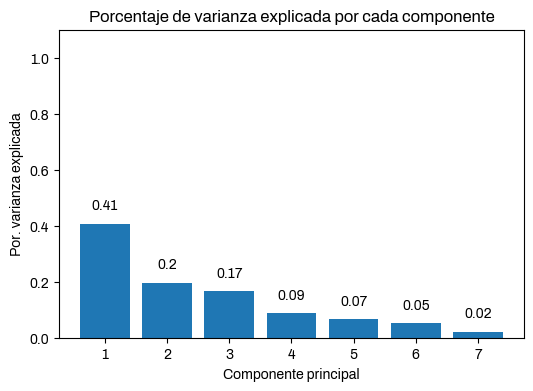

In [18]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_temp.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.4072474  0.60382137 0.77090658 0.85892293 0.92639864 0.97809596
 1.        ]


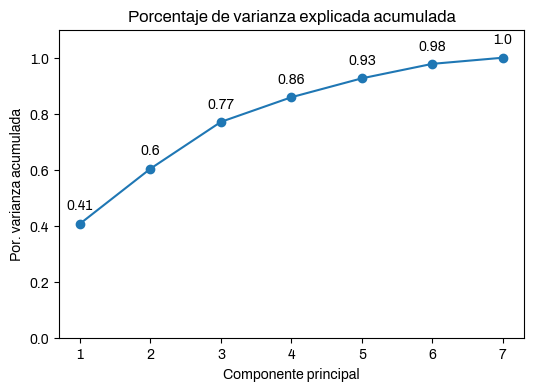

In [19]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df_temp.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_temp.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [20]:
def biplot(score, coef, labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=50, 
                color='blue')
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkblue', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()

In [27]:
df_loadings.to_clipboard()

In [25]:
df_loadings

,Actividad,Formalidad,Horas promedio remuneradas,Ingreso laboral promedio,Tiempo TNR,Dependencia,No Pobreza
PC1,0.266303,-0.431797,-0.374002,-0.536837,0.311335,-0.297599,-0.359260
PC2,0.166158,0.228294,0.527116,0.208455,0.569809,-0.515876,-0.090329
PC3,-0.685436,0.252446,-0.080364,-0.028217,0.227632,0.157175,-0.618607
PC4,0.483168,0.389127,-0.022829,-0.167480,0.377373,0.663879,-0.058420
PC5,0.032781,0.653931,-0.610639,-0.014187,-0.029736,-0.397351,0.198614
PC6,-0.414181,-0.205019,-0.136515,-0.105270,0.576789,0.118829,0.640232
PC7,-0.159940,0.276814,0.428691,-0.792606,-0.224927,-0.088654,0.165352


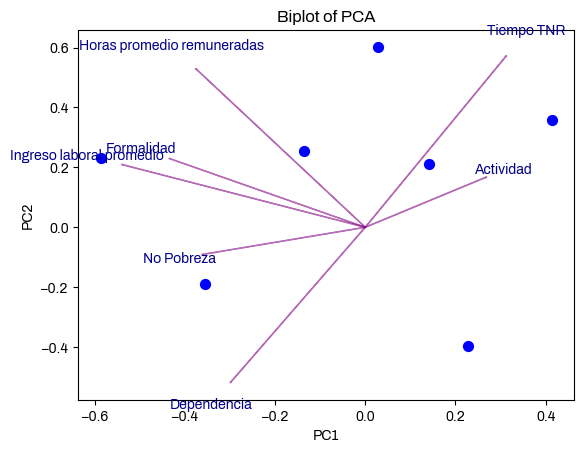

<Figure size 640x480 with 0 Axes>

In [21]:
plt.title('Biplot of PCA')
 
biplot(df_loadings.values, 
       np.transpose(modelo_pca.components_), 
       list(df_temp.columns))

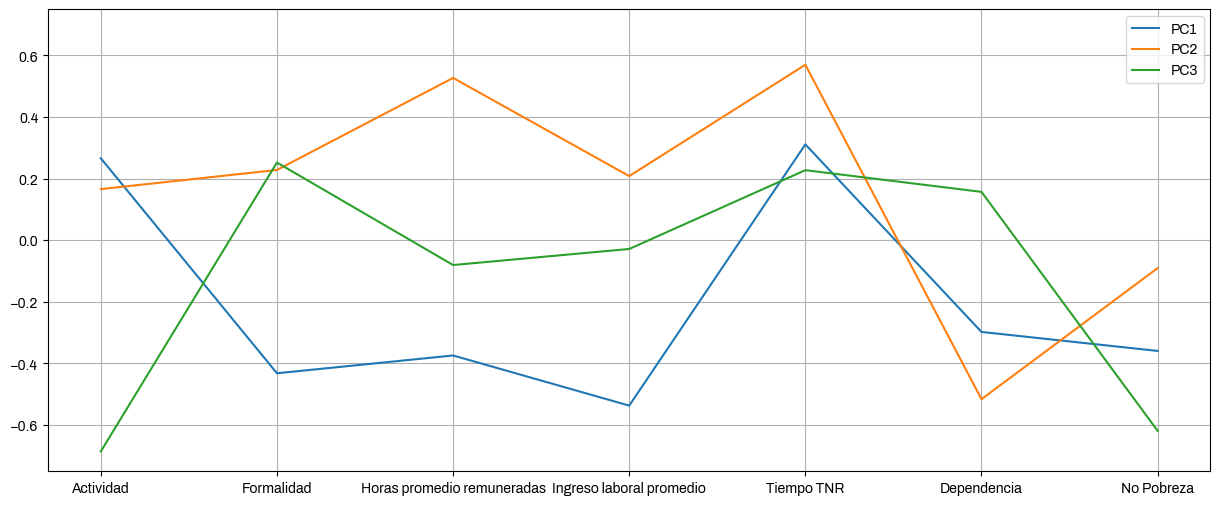

In [22]:
df_loadings.loc[['PC1', 'PC2', 'PC3']].T.plot(figsize=(15,6))
plt.ylim([-0.75,0.75])
plt.grid()